In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
Datos = pd.read_csv("Titanic-Dataset.csv")

# 1. Análisis exploratorio de los datos

In [13]:
Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


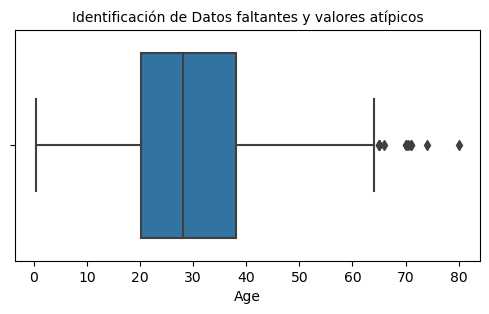

In [15]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos["Age"])
plt.title("Identificación de Datos faltantes y valores atípicos", fontsize=10)
plt.show()

# 2. Preprocesamiento de los datos

In [18]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en hermanos/cónyuges: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en padres/hijos: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en tarifa: ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en hermanos/cónyuges:  0
Cantidad de Registros con cero en padres/hijos:  0
Cantidad de Registros con cero en tarifa:  0


In [17]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [22]:
# Eliminamos los datos duplicados
Datos.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.000000,0.381594,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.000000,0.381594,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.523008,0.381594,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.000000,0.381594,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.523008,0.381594,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.523008,0.381594,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.523008,0.381594,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.000000,2.000000,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.523008,0.381594,111369,30.0000,C148,C


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

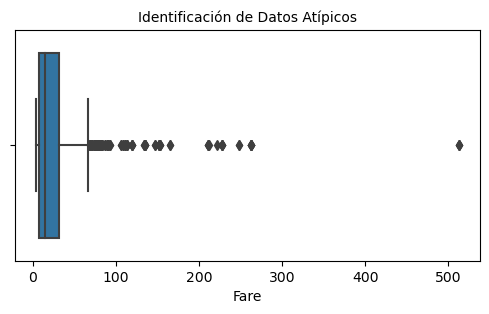

In [23]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

# 3. Selección de características relevantes para el entrenamiento

Característica de interes:

Survived: si la persona sobrevivió o no (0 = no sobrevivió - 1 = si sobrevivió)
Predecir si una persona sobrevivió.

In [24]:
# Total de sobrevivientes

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# 4. División del dataset en Train y Test

In [25]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [26]:
print (X_train)

     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   
..           ...     ...                                                ...   
131          132       3                     Coelho, Mr. Domingos Fernandeo   
490          491       3               Hagland, Mr. Konrad Mathias Reiersen   
528          529       3                          Salonen, Mr. Johan Werner   
48            49       3                                Samaan, Mr. Youssef   
80            81       3                               Waelens, Mr. Achille   

        Sex   Age     SibSp     Parch              

In [27]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


# 5. Entrenamiento del modelo por medio de los hiperparametros

In [28]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

ValueError: could not convert string to float: 'Davidson, Mr. Thornton'